# RANDOMLY SEARCH FOR WEIGHT AND BIAS COMBINATION

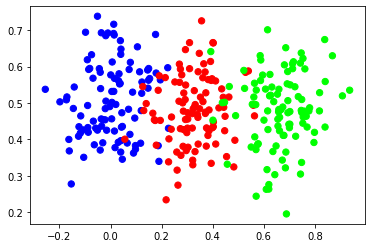

New set of weights found, iteration: 0 loss: 1.0987684 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987465 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0976487 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.097202 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0938749 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0935849 acc: 0.6666666666666666
New set of weights found, iteration: 20 loss: 1.0908297 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0905013 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0879314 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.0856307 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0801181 acc: 0.35
New set of weights found, iteration: 29 loss: 1.0725244 acc: 0.5266666666666666
New set of weights found, iteration: 30 loss: 1.0724432 acc

In [8]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
from NetworkClasses.Loss import *
from NetworkClasses.Layers import *
from NetworkClasses.ActivationFunctions import *

import matplotlib.pyplot as plt

nnfs.init()


# Create dataset
X, y = vertical_data(samples=100, classes=3)


################
plt.figure(facecolor='white')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="brg")
plt.show()
################

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)


    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()